In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

d100 for now

In [2]:
from nilearn import image, plotting
from atlasreader.atlasreader import read_atlas_peak

"""
available reference atlases
---------------------------
    "aal",
    "aicha",
    "desikan_killiany",
    "destrieux",
    "harvard_oxford",
    "juelich",
    "marsatlas",
    "neuromorphometrics",
    "talairach_ba",
    "talairach_gyrus",
 """

atlas = image.threshold_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz", "99.5%") 
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
brain_region = []
print("BRAIN REGIONS:\n--------------")
for atlas_coord in atlas_coords:
    region = read_atlas_peak("harvard_oxford", atlas_coord)
    print(region)
    brain_region += [region]

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

BRAIN REGIONS:
--------------
[[np.float64(62.0), 'Right_Occipital_Pole']]
[[np.float64(50.0), 'Right_Lateral_Occipital_Cortex_superior_division'], [np.float64(30.0), 'Right_Angular_Gyrus']]
[[np.float64(56.0), 'Right_Lateral_Occipital_Cortex_inferior_division'], [np.float64(14.0), 'Right_Occipital_Pole']]
[[np.float64(54.0), 'Left_Cuneal_Cortex'], [np.float64(9.0), 'Right_Cuneal_Cortex']]
[[np.float64(81.0), 'Left_Supramarginal_Gyrus_anterior_division'], [np.float64(6.0), 'Left_Supramarginal_Gyrus_posterior_division']]
[[np.float64(85.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(66.

In [3]:
#select the correct region with largest probability given from the library
brain_region = [
    max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in brain_region
]
brain_region

['Right_Occipital_Pole',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Lateral_Occipital_Cortex_inferior_division',
 'Left_Cuneal_Cortex',
 'Left_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Supramarginal_Gyrus_posterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Right_Precuneous_Cortex',
 'Right_Occipital_Fusiform_Gyrus',
 'Left_Angular_Gyrus',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Precuneous_Cortex',
 'Right_Occipital_Pole',
 'Right_Intracalcarine_Cortex',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Postcentral_Gyrus',
 'Left_Superior_Frontal_Gyrus',
 'Right_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Lef

In [6]:
open_access_data = pd.read_csv("Behavioral Data/Behavioral_Data.csv")
restricted_data = pd.read_csv("Behavioral Data/RESTRICTED_BEHAVIORAL_DATA.csv")
subject_data = open_access_data.merge(restricted_data, how = 'inner', on = 'Subject')

folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2'
brain_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
brain_data = {}

for filename in brain_files:
    subject_id = int(filename[:6])
    file_path = os.path.join(folder, filename)
    subject_brain_data = np.loadtxt(file_path)
    brain_data[subject_id] = subject_brain_data

brain_data_df = pd.DataFrame({
    'Subject': list(brain_data.keys()),
    'Brain_Data': list(brain_data.values())  # (4800, 100) arrays
})
brain_data_df

data = subject_data.merge(brain_data_df, on='Subject', how='inner')

In [7]:
data.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,Brain_Data
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[-17.817, 6.4591, 75.159, 63.752, -3.8965, 28..."
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,"[[21.753, 3.6099, -23.662, -15.485, 60.84, -18..."
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0,"[[112.55, -54.284, -51.51, -62.453, 90.959, 95..."
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"[[-113.14, -91.451, -16.406, 13.531, 169.7, -3..."
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,"[[-177.94, -107.2, -124.42, -44.5, 5.1172, 15...."


In [8]:
data["Handedness_Cat"] = data["Handedness"].apply(lambda x: "Left" if x < 0 else "Right") # no threshold 
hand_data = data[["Subject", "Gender", "Race", "Handedness", "Handedness_Cat"]]
hand_data

,Subject,Gender,Race,Handedness,Handedness_Cat
0,100206,M,White,65,Right
1,100307,F,White,95,Right
2,100408,M,White,55,Right
3,100610,M,White,85,Right
4,101006,F,Black or African Am.,90,Right
...,...,...,...,...,...
998,992673,F,White,70,Right
999,992774,M,White,100,Right
1000,993675,F,White,85,Right
1001,994273,M,White,60,Right


Correlation Matrixces

In [9]:
correlation_matrix_list = []
for i in range(data.shape[0]):
    person = data["Brain_Data"][i]
    #get matrix
    person_matrix = np.corrcoef(person.T)
    #append to list
    correlation_matrix_list.append(person_matrix)
#append to column
data["correlation_matrix"] = correlation_matrix_list

In [10]:
data["correlation_matrix"]

0       [[1.0, -0.0338191132436591, 0.6320023466487581...
1       [[1.0, -0.05357125566667345, 0.416846676528844...
2       [[1.0, -0.06527209331431859, 0.343919331534949...
3       [[1.0, 0.03483607578914373, 0.2461541961309962...
4       [[1.0, 0.22646218683828628, 0.3200554052820826...
                              ...                        
998     [[1.0, -0.05700951869724855, 0.056421358264344...
999     [[0.9999999999999999, 0.14797456065133022, 0.4...
1000    [[0.9999999999999999, -0.12563798932117914, 0....
1001    [[0.9999999999999999, 0.04063140015289049, 0.5...
1002    [[0.9999999999999999, 0.06446200081694943, 0.3...
Name: correlation_matrix, Length: 1003, dtype: object

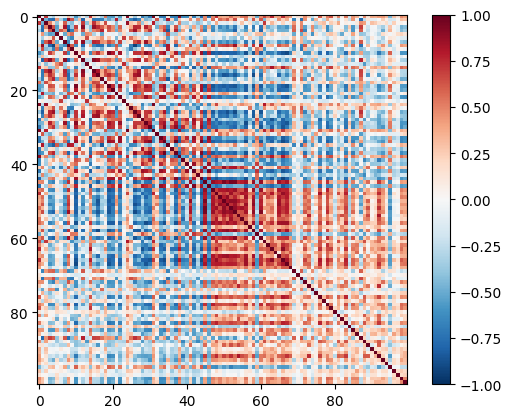

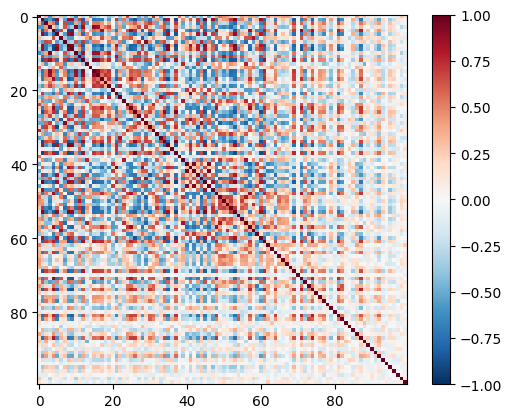

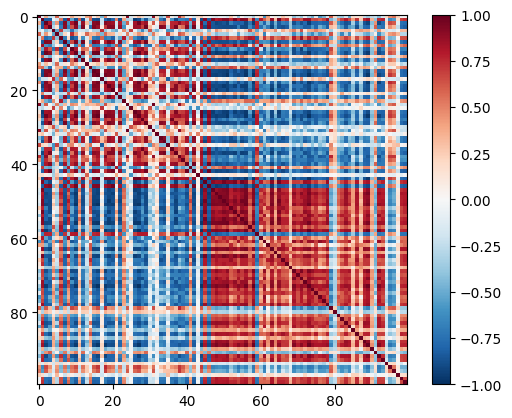

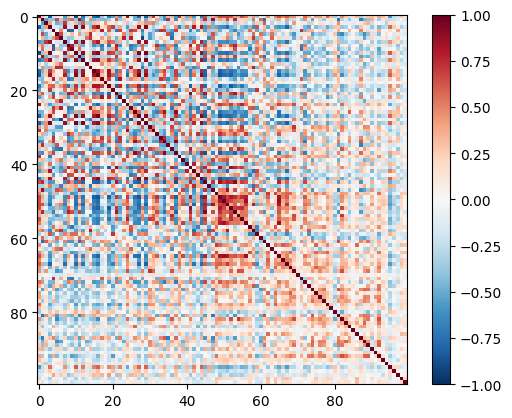

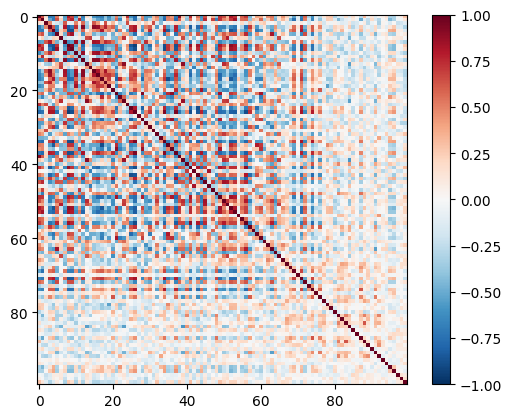

In [11]:
# plot first 5
for i in range(5):
    plt.figure()
    plt.imshow(np.corrcoef(correlation_matrix_list[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()

Transforming Handedness

In [13]:
left_handed = data[data['Handedness_Cat'] == 'Left']
right_handed = data[data['Handedness_Cat'] == 'Right']

# Handedness statistics
pd.DataFrame([
    left_handed.describe()['Handedness'], 
    right_handed.describe()['Handedness'], 
    data['Handedness'].describe()
], index=['Left-Handed', 'Right-Handed', 'Overall']).T


,Left-Handed,Right-Handed,Overall
count,88.000000,915.000000,1003.000000
mean,-57.670455,78.256831,66.331007
std,26.576163,19.868128,43.608425
min,-100.000000,0.000000,-100.000000
25%,-80.000000,70.000000,60.000000
50%,-60.000000,80.000000,80.000000
75%,-40.000000,95.000000,95.000000
max,-5.000000,100.000000,100.000000


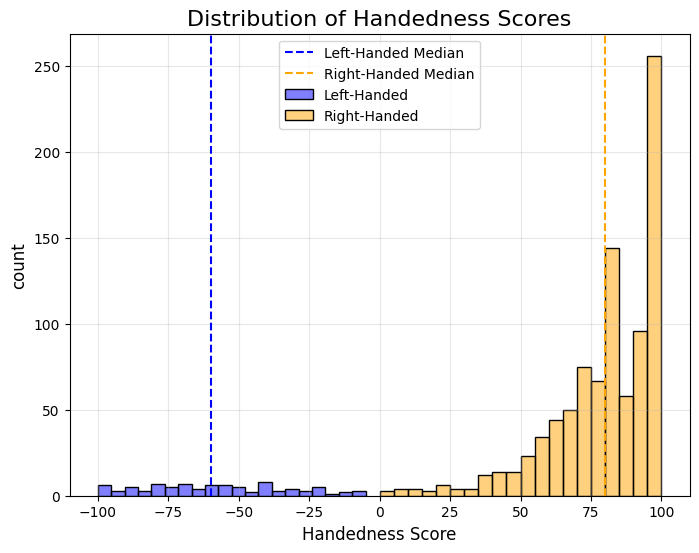

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(left_handed['Handedness'], color='blue', label='Left-Handed', kde=False, bins=20, alpha=0.5)
sns.histplot(right_handed['Handedness'], color='orange', label='Right-Handed', kde=False, bins=20, alpha=0.5)


# mark medians
plt.axvline(left_handed['Handedness'].median(), color='blue', linestyle='--', label='Left-Handed Median')
plt.axvline(right_handed['Handedness'].median(), color='orange', linestyle='--', label='Right-Handed Median')

# Labels and title
plt.xlabel('Handedness Score', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('Distribution of Handedness Scores', fontsize=16)
plt.legend()

plt.grid(alpha=0.3)
plt.show()

Log tranformation

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


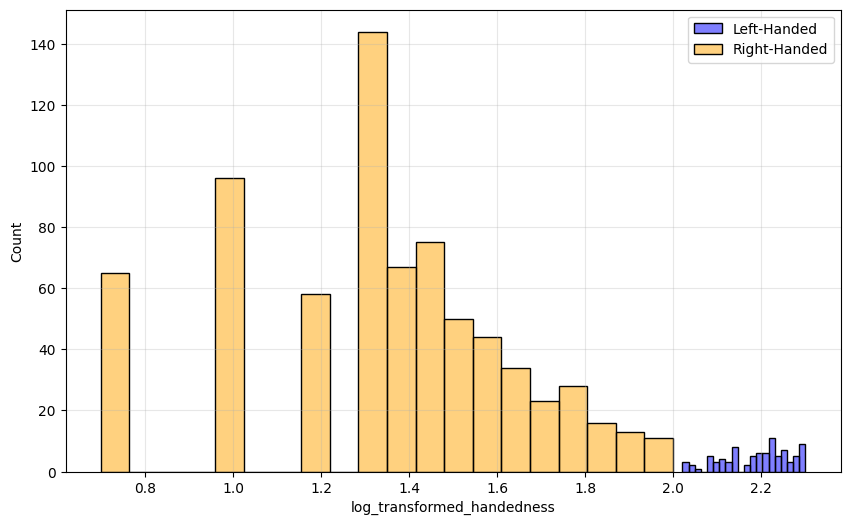

In [43]:
data['log_transformed_handedness'] = np.log10(100-data['Handedness'])

left_handed = data[data['Handedness_Cat'] == 'Left']
right_handed = data[data['Handedness_Cat'] == 'Right']

plt.figure(figsize=(10, 6))
sns.histplot(data=left_handed['log_transformed_handedness'], label='Left-Handed', color='blue', kde=False, bins=20, alpha=0.5)
sns.histplot(data=right_handed['log_transformed_handedness'], label='Right-Handed', color='orange', kde=False, bins=20, alpha=0.5)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

square root transformation

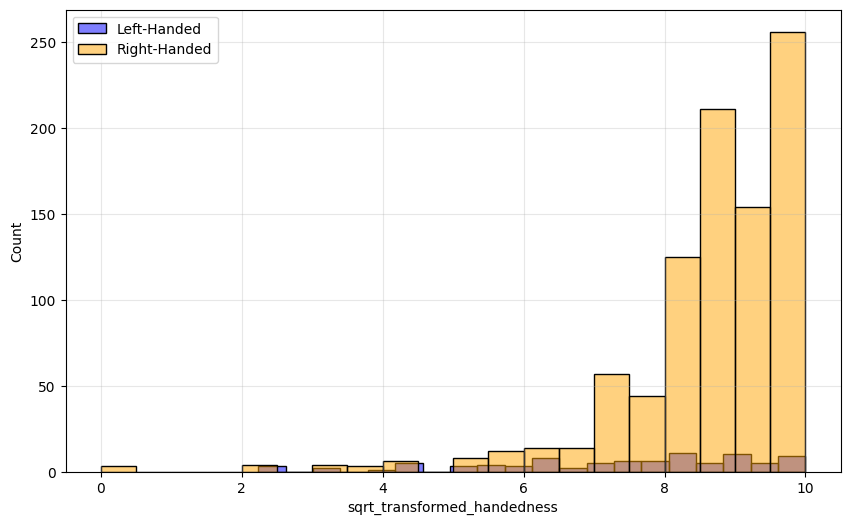

In [44]:
data['sqrt_transformed_handedness'] = data['Handedness'].abs()**0.5

left_handed = data[data['Handedness_Cat'] == 'Left']
right_handed = data[data['Handedness_Cat'] == 'Right']

plt.figure(figsize=(10, 6))
sns.histplot(data=left_handed['sqrt_transformed_handedness'], label='Left-Handed', color='blue', kde=False, bins=20, alpha=0.5)
sns.histplot(data=right_handed['sqrt_transformed_handedness'], label='Right-Handed', color='orange', kde=False, bins=20, alpha=0.5)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

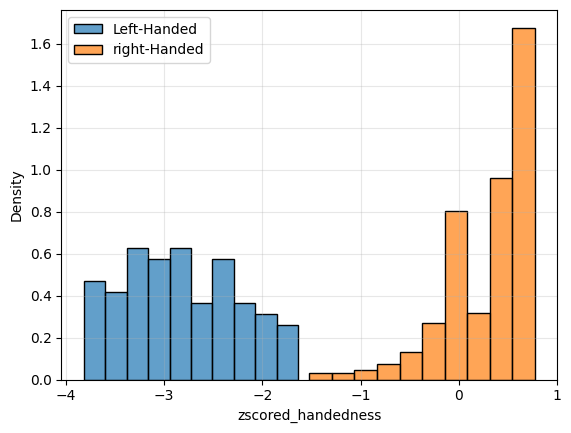

In [45]:
from scipy.stats import zscore

data['zscored_handedness'] = zscore(data['Handedness'])

left_handed = data[data['Handedness_Cat'] == 'Left']
right_handed = data[data['Handedness_Cat'] == 'Right']

sns.histplot(left_handed['zscored_handedness'],label='Left-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')
sns.histplot(right_handed['zscored_handedness'], label='right-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')

plt.legend()
plt.grid(alpha=0.3)
plt.show()

/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_64837/3313332115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_handed['standardized_handedness'] = (left_handed['Handedness'] - mean_value) / std_value
/var/folders/bz/8tkr7qg51_1bcjy3cf4g8fzc0000gn/T/ipykernel_64837/3313332115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_handed['standardized_handedness'] = (right_handed['Handedness'] - mean_value) / std_value


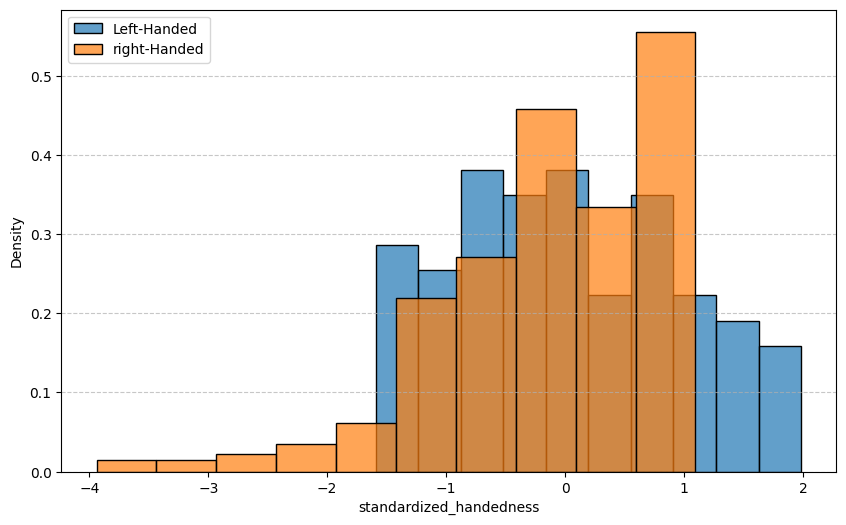

In [46]:
mean_value = left_handed['Handedness'].mean()
std_value = left_handed['Handedness'].std()
left_handed['standardized_handedness'] = (left_handed['Handedness'] - mean_value) / std_value

mean_value = right_handed['Handedness'].mean()
std_value = right_handed['Handedness'].std()
right_handed['standardized_handedness'] = (right_handed['Handedness'] - mean_value) / std_value

plt.figure(figsize=(10, 6))
sns.histplot(left_handed['standardized_handedness'],label='Left-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')
sns.histplot(right_handed['standardized_handedness'], label='right-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

Symmetric Transformation (Box-Cox)

In [47]:
from scipy.stats import boxcox

data['BoxCox_Handedness'], lambda_ = boxcox(data['Handedness'].abs() + 100)  # Shift to ensure all values are positive
data['BoxCox_Handedness']

0       1.126956e+09
1       2.338952e+09
2       8.574844e+08
3       1.858186e+09
4       2.087915e+09
            ...     
998     1.284033e+09
999     2.612651e+09
1000    1.858186e+09
1001    9.851309e+08
1002    2.612651e+09
Name: BoxCox_Handedness, Length: 1003, dtype: float64

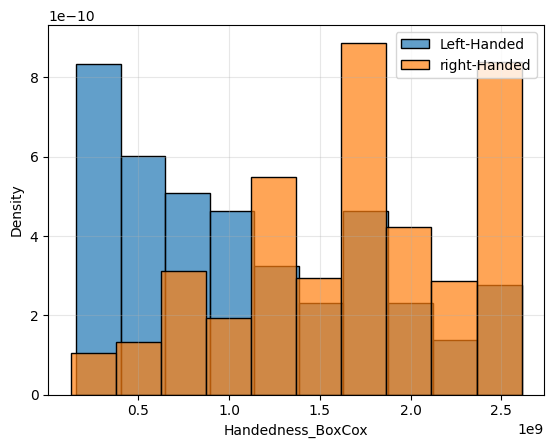

In [48]:
left_handed = data[data['Handedness_Cat'] == 'Left']
right_handed = data[data['Handedness_Cat'] == 'Right']

sns.histplot(left_handed['Handedness_BoxCox'],label='Left-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')
sns.histplot(right_handed['Handedness_BoxCox'], label='right-Handed',bins=10, edgecolor='black', alpha=0.7, stat='density')

plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [51]:
# from scipy.stats import skew, kurtosis

# print("Original Skewness:", skew(data['Handedness']))
# print("Transformed Skewness:", skew(data['log_transformed_handedness']))

# print("Original Kurtosis:", kurtosis(data['Handedness']))
# print("Transformed Kurtosis:", kurtosis(data['log_transformed_handedness']))
